In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(".//dataset//Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
if df['N'].all()>90:
    print(df['N'])

In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Text(0.5, 1.0, 'Temperature vs Crop')

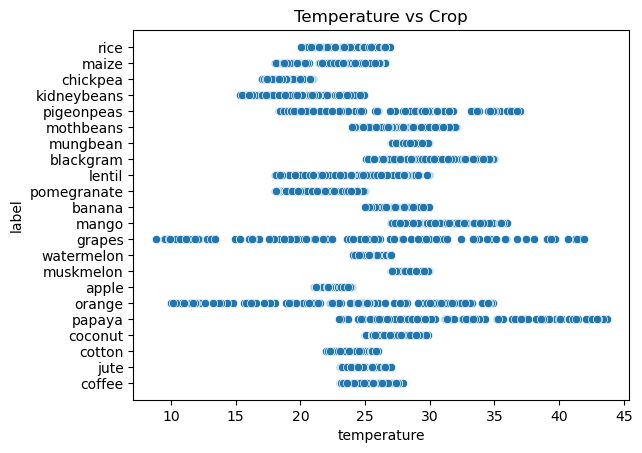

In [55]:
sns.scatterplot(x='temperature', y='label', data=df)
plt.title('Temperature vs Crop')

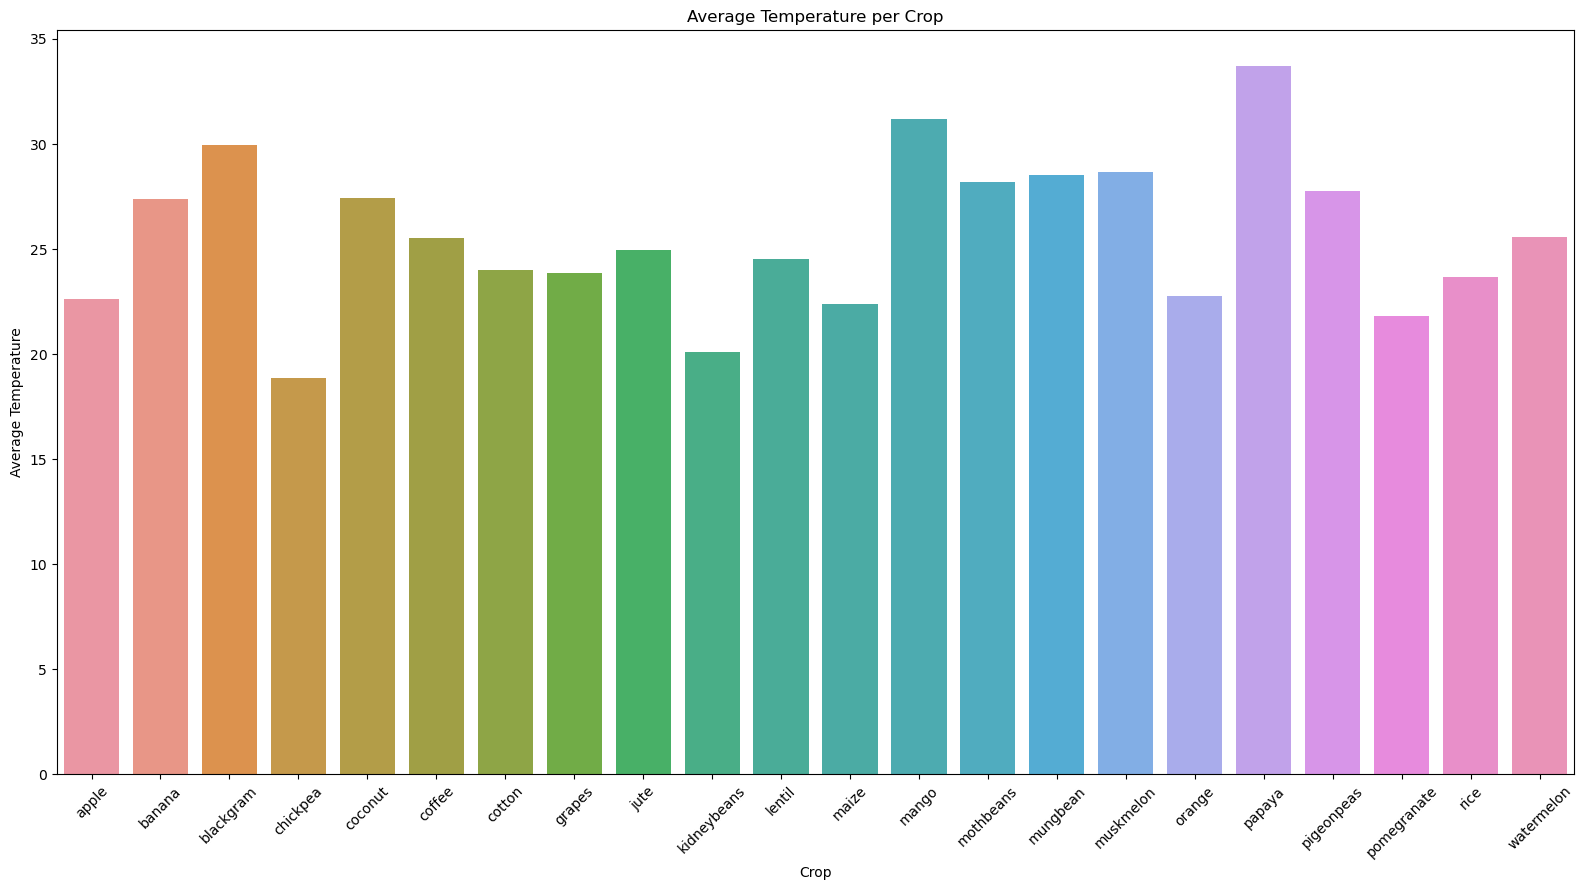

In [41]:
avg_temp_per_crop = df.groupby('label')['temperature'].mean().reset_index()
plt.figure(figsize=(16, 9))
sns.barplot(x='label', y='temperature', data=avg_temp_per_crop)

plt.xlabel('Crop')
plt.ylabel('Average Temperature')
plt.title('Average Temperature per Crop')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

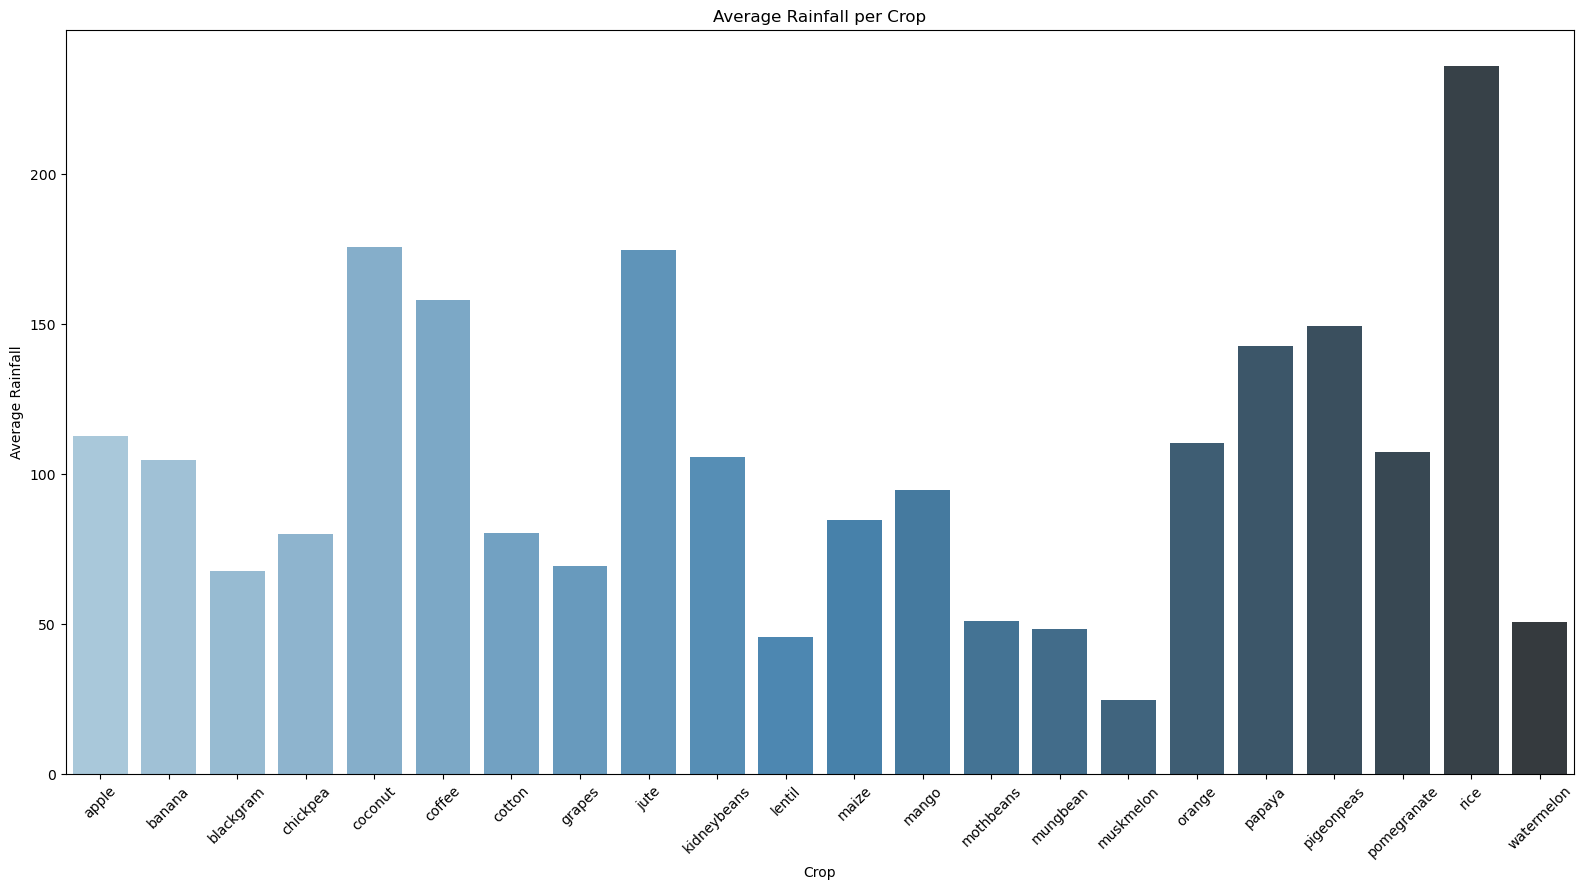

In [42]:
avg_rainfall = df.groupby('label')['rainfall'].mean().reset_index()
plt.figure(figsize=(16, 9))
sns.barplot(x='label', y='rainfall', data=avg_rainfall, palette='Blues_d')

plt.xlabel('Crop')
plt.ylabel('Average Rainfall')
plt.title('Average Rainfall per Crop')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [53]:
import plotly.express as px
fig = px.scatter_3d(df, x='N', y='temperature', z='humidity', color='label')
fig.show()


In [6]:
x = df.drop('label', axis = 1)
y = df['label']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify = y, random_state = 1)

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
logistic_acc = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression is " + str(logistic_acc))

Accuracy of logistic regression is 0.9618181818181818


c:\Users\patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(criterion='entropy',max_depth = 6, random_state = 2)
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)
decision_acc = accuracy_score(y_test, y_pred_2)
print("Accuracy of decision  tree is " + str(decision_acc))

Accuracy of decision  tree is 0.9781818181818182


In [10]:
from sklearn.naive_bayes import GaussianNB
model_3 = GaussianNB()
model_3.fit(x_train, y_train)
y_pred_3 = model_3.predict(x_test)
naive_bayes_acc = accuracy_score(y_test, y_pred_3)
print("Accuracy of naive_bayes is " + str(naive_bayes_acc))

Accuracy of naive_bayes is 0.9945454545454545


In [11]:
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators = 25, random_state=2)
model_4.fit(x_train.values, y_train.values)
y_pred_4 = model_4.predict(x_test)
random_fore_acc = accuracy_score(y_test, y_pred_4)
print("Accuracy of Random Forest is " + str(random_fore_acc))


Accuracy of Random Forest is 0.9945454545454545


c:\Users\patil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=2),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=25, random_state=2)
}

# Store results
accuracies = {}
reports = {}
conf_matrices = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    reports[name] = classification_report(y_test, y_pred, output_dict=True)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))


c:\Users\patil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.9618
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        25
      banana       1.00      1.00      1.00        25
   blackgram       0.88      0.92      0.90        25
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      0.96      0.98        25
      coffee       1.00      1.00      1.00        25
      cotton       0.85      0.88      0.86        25
      grapes       1.00      1.00      1.00        25
        jute       0.88      0.88      0.88        25
 kidneybeans       1.00      1.00      1.00        25
      lentil       0.96      0.96      0.96        25
       maize       0.87      0.80      0.83        25
       mango       1.00      1.00      1.00        25
   mothbeans       0.92      0.96      0.94        25
    mungbean       1.00      0.96      0.98        25
   muskmelon       1.00      1.00      1.00        25

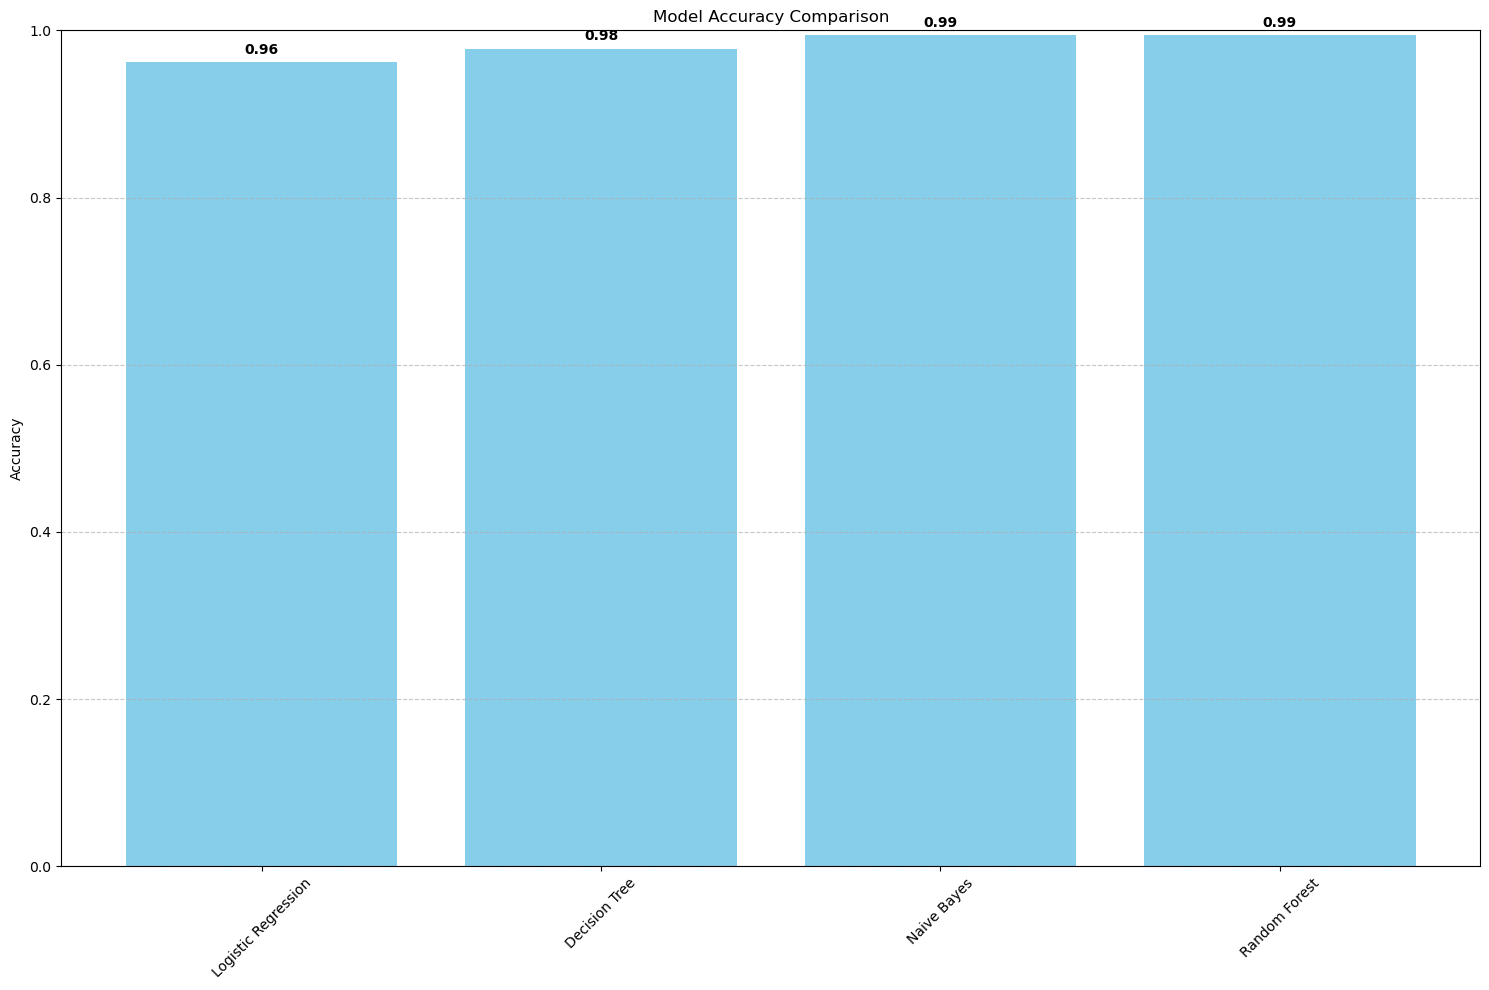

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show accuracy values on top of bars
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [14]:
import joblib 

In [15]:
file_name = 'crop_app'

In [16]:
joblib.dump(model_4,'crop_app')

['crop_app']

In [17]:
app = joblib.load('crop_app')

In [18]:
arr = [[90,42,43,20.879744,82.002744,6.502985,202.935536]]
acc = app.predict(arr)

In [19]:
acc

array(['rice'], dtype=object)

In [20]:
import pickle

In [21]:
Pkl_Filename = "crop_app.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_4, file)

In [22]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_Model = pickle.load(file)

Pickled_Model

RandomForestClassifier(n_estimators=25, random_state=2)